In [26]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [27]:
collision = pd.read_csv('FATALS_KSI_1439658600737696253.csv')
collision.head()

,OBJECTID,INDEX,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,x,y
0,1,3363207,882024.0,1/7/2006 5:00:00 AM,2325,STEELES AVE E,NINTH LINE ST,NaN,Minor Arterial,Scarborough,...,NaN,NaN,NaN,144,Morningside Heights,131,Rouge (131),D42,642702.497370,4.855938e+06
1,2,3363869,882497.0,1/8/2006 5:00:00 AM,1828,ISLINGTON AVE,GOLFDOWN DR,NaN,Major Arterial,Etobicoke York,...,NaN,NaN,NaN,5,Elms-Old Rexdale,5,Elms-Old Rexdale (5),D23,616144.186758,4.841944e+06
2,3,3363416,882174.0,1/9/2006 5:00:00 AM,1435,KENNEDY RD,GLAMORGAN AVE,NaN,Major Arterial,Scarborough,...,NaN,NaN,NaN,126,Dorset Park,126,Dorset Park (126),D41,638249.238267,4.847699e+06
3,4,3363879,882501.0,1/11/2006 5:00:00 AM,1120,BARTLEY DR,JINNAH CRT,NaN,Collector,North York,...,NaN,NaN,NaN,43,Victoria Village,43,Victoria Village (43),D55,636288.290910,4.842392e+06
4,5,3371161,886230.0,1/21/2006 5:00:00 AM,1829,MIDLAND AVE,GOODLAND GT,NaN,Major Arterial,Scarborough,...,NaN,NaN,NaN,128,Agincourt South-Malvern West,128,Agincourt South-Malvern West (128),D42,638765.590119,4.848810e+06


In [28]:
collision.shape

(976, 54)

In [29]:
collision.describe()

,OBJECTID,INDEX,ACCNUM,TIME,LATITUDE,LONGITUDE,FATAL_NO,x,y
count,976.000000,9.760000e+02,6.400000e+02,976.000000,976.000000,976.000000,865.000000,976.000000,9.760000e+02
mean,488.500000,5.033150e+07,5.553307e+08,1313.015369,43.717105,-79.393589,28.865896,629400.235618,4.841712e+06
std,281.891232,3.697166e+07,1.026129e+09,669.990911,0.056949,0.110108,17.642949,8813.816288,6.404527e+03
min,1.000000,3.363207e+06,2.629400e+04,0.000000,43.589678,-79.620990,1.000000,611017.556945,4.827328e+06
25%,244.750000,6.274044e+06,1.057707e+06,813.000000,43.668795,-79.477800,14.000000,622715.906090,4.836336e+06
50%,488.500000,8.048999e+07,1.300792e+06,1405.000000,43.719124,-79.397106,28.000000,629230.025155,4.841891e+06
75%,732.250000,8.110064e+07,1.001036e+09,1855.250000,43.760350,-79.303615,42.000000,636554.517232,4.846480e+06
max,976.000000,8.175416e+07,4.003563e+09,2359.000000,43.848780,-79.146190,78.000000,649130.192829,4.856655e+06


In [37]:
collision.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           976 non-null    int64  
 1   INDEX              976 non-null    int64  
 2   ACCNUM             640 non-null    float64
 3   DATE               976 non-null    object 
 4   TIME               976 non-null    int64  
 5   STREET1            976 non-null    object 
 6   STREET2            877 non-null    object 
 7   OFFSET             105 non-null    object 
 8   ROAD_CLASS         951 non-null    object 
 9   DISTRICT           971 non-null    object 
 10  LATITUDE           976 non-null    float64
 11  LONGITUDE          976 non-null    float64
 12  ACCLOC             714 non-null    object 
 13  TRAFFCTL           974 non-null    object 
 14  VISIBILITY         964 non-null    object 
 15  LIGHT              974 non-null    object 
 16  RDSFCOND           963 non

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [31]:
print("\nMissing Values Per Column:")
print(collision.isnull().sum()) 


Missing Values Per Column:
OBJECTID               0
INDEX                  0
ACCNUM               336
DATE                   0
TIME                   0
STREET1                0
STREET2               99
OFFSET               871
ROAD_CLASS            25
DISTRICT               5
LATITUDE               0
LONGITUDE              0
ACCLOC               262
TRAFFCTL               2
VISIBILITY            12
LIGHT                  2
RDSFCOND              13
ACCLASS                1
IMPACTYPE              1
INVTYPE                0
INVAGE                 0
INJURY                 0
FATAL_NO             111
INITDIR              117
VEHTYPE              417
MANOEUVER            642
DRIVACT              697
DRIVCOND             699
PEDTYPE              437
PEDACT               434
PEDCOND              439
CYCLISTYPE           931
CYCACT               932
CYCCOND              932
PEDESTRIAN           430
CYCLIST              930
AUTOMOBILE           162
MOTORCYCLE           874
TRUCK                8

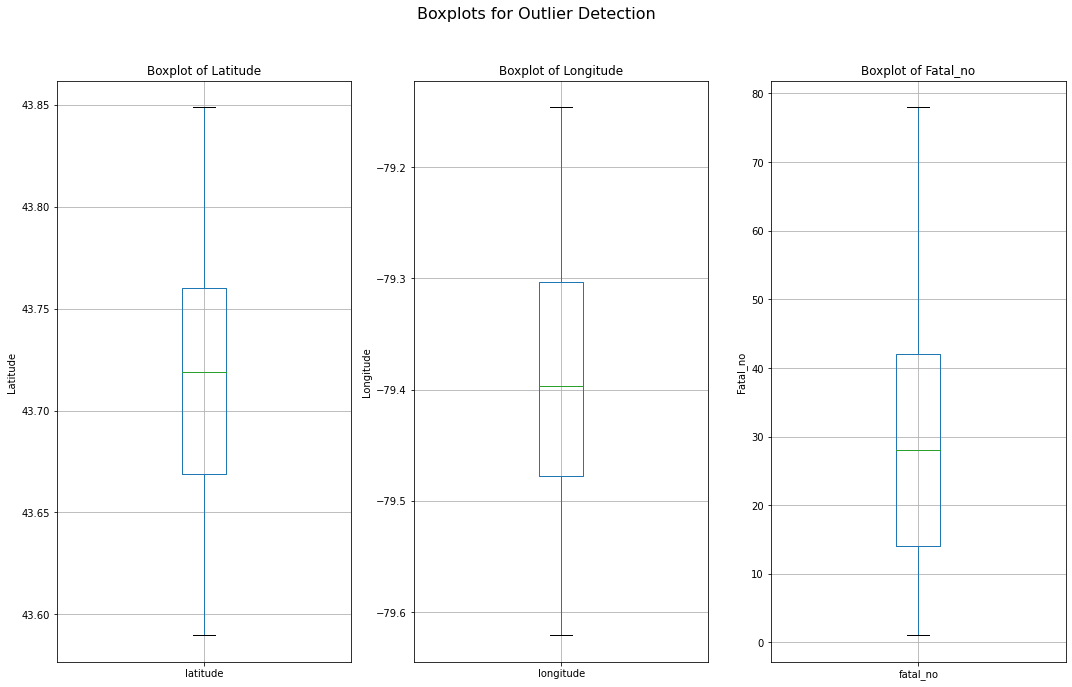

In [32]:
# Sanitize column names
collision.columns = collision.columns.str.strip().str.lower().str.replace(' ', '_')

# Columns to plot (ensure sanitized names are used)
columns_to_plot = ['speeding', 'latitude', 'longitude', 'fatal_no', 'response_time']

# Verify columns exist and are numerical
existing_columns = [col for col in columns_to_plot if col in collision.columns and pd.api.types.is_numeric_dtype(collision[col])]

if not existing_columns:
    print("No valid numerical columns found for plotting.")
else:
    # Plot boxplots for existing numerical columns
    plt.figure(figsize=(15, 10))

    for i, column in enumerate(existing_columns, 1):
        plt.subplot(1, len(existing_columns), i)
        collision.boxplot(column=column)
        plt.ylabel(column.capitalize())
        plt.title(f"Boxplot of {column.capitalize()}")

    plt.suptitle("Boxplots for Outlier Detection", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [33]:
# Function to remove outliers based on IQR and replace with interpolated value
def remove_outliers(df, column):
    # Ensure the column is numeric
    if not pd.api.types.is_numeric_dtype(df[column]):
        print(f"Skipping column {column} because it is not numeric.")
        return df
    
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                   # Inter-Quartile Range
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers and replace with None
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = None
    
    # Interpolate to replace None values
    df[column] = df[column].interpolate(method='linear', limit_direction='both')
    
    return df

# Function to remove values exceeding a maximum threshold and interpolate
def max_threshold(df, column, threshold):
    # Ensure the column is numeric
    if not pd.api.types.is_numeric_dtype(df[column]):
        print(f"Skipping column {column} because it is not numeric.")
        return df
    
    # Replace values above the threshold
    df.loc[df[column] > threshold, column] = None

    # Interpolate missing values
    df[column] = df[column].interpolate(method='linear', limit_direction='both')

    return df

# Clean data function
def clean_data(data):
    # Sanitize column names
    data_cleaned = data.copy()
    data_cleaned.columns = data_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')

    # Define columns for processing
    columns_to_remove_outliers = ['speeding', 'latitude', 'longitude', 'fatal_no', 'response_time']
    max_threshold_columns = {'speeding': 200}  # Column thresholds for specific columns

    # Remove outliers from relevant columns
    for col in columns_to_remove_outliers:
        if col in data_cleaned.columns:
            print(f"Removing outliers in column: {col}")
            data_cleaned = remove_outliers(data_cleaned, col)

    # Apply maximum thresholds to specified columns
    for col, threshold in max_threshold_columns.items():
        if col in data_cleaned.columns:
            print(f"Applying maximum threshold of {threshold} to column: {col}")
            data_cleaned = max_threshold(data_cleaned, col, threshold)

    return data_cleaned

# Load dataset
file_path = "FATALS_KSI_1439658600737696253.csv"
collision = pd.read_csv(file_path)

# Clean the dataset
cleaned_collision = clean_data(collision)

# Save the cleaned dataset
cleaned_collision.to_csv("cleaned_collision_data.csv", index=False)

print("Data cleaning complete. Cleaned data saved to 'cleaned_collision_data.csv'.")



Removing outliers in column: speeding
Skipping column speeding because it is not numeric.
Removing outliers in column: latitude
Removing outliers in column: longitude
Removing outliers in column: fatal_no
Applying maximum threshold of 200 to column: speeding
Skipping column speeding because it is not numeric.
Data cleaning complete. Cleaned data saved to 'cleaned_collision_data.csv'.


In [34]:
collision.describe()

,OBJECTID,INDEX,ACCNUM,TIME,LATITUDE,LONGITUDE,FATAL_NO,x,y
count,976.000000,9.760000e+02,6.400000e+02,976.000000,976.000000,976.000000,865.000000,976.000000,9.760000e+02
mean,488.500000,5.033150e+07,5.553307e+08,1313.015369,43.717105,-79.393589,28.865896,629400.235618,4.841712e+06
std,281.891232,3.697166e+07,1.026129e+09,669.990911,0.056949,0.110108,17.642949,8813.816288,6.404527e+03
min,1.000000,3.363207e+06,2.629400e+04,0.000000,43.589678,-79.620990,1.000000,611017.556945,4.827328e+06
25%,244.750000,6.274044e+06,1.057707e+06,813.000000,43.668795,-79.477800,14.000000,622715.906090,4.836336e+06
50%,488.500000,8.048999e+07,1.300792e+06,1405.000000,43.719124,-79.397106,28.000000,629230.025155,4.841891e+06
75%,732.250000,8.110064e+07,1.001036e+09,1855.250000,43.760350,-79.303615,42.000000,636554.517232,4.846480e+06
max,976.000000,8.175416e+07,4.003563e+09,2359.000000,43.848780,-79.146190,78.000000,649130.192829,4.856655e+06


EDA